# Counting the number of Lemons in an Image ( using Open CV ) !

In [ ]:
import numpy as np
import cv2
import skimage.io as sk
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
def show(img):
    plt.imshow(img)
    plt.show()

# Lets have a look at the image we would be using !
### As an excercise, try manually counting all the lemons and later 
### let's compare the result with the answer of the algorithm :)

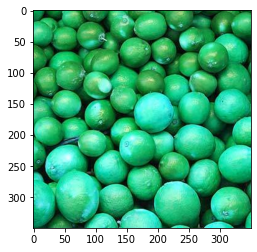

In [ ]:
fp = "lemon1.jpg"
#this is path to your image. 
# Make sure you have loaded it in your environment if you are using Jupyter Notebook.
# In case you are using Google Colab then, you can call it from your drive or 
# load it in the working environment itself 

img = cv2.imread(fp)
show(img)

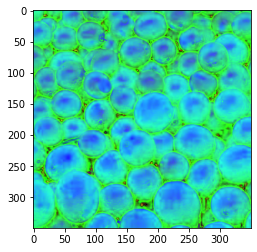

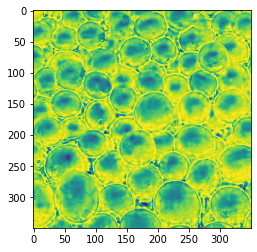

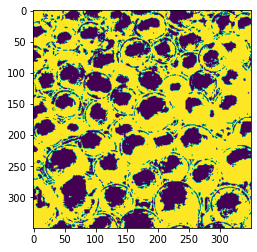

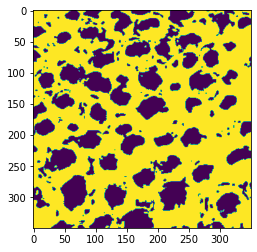

In [ ]:
#preprocessing the image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

h, s, v = cv2.split(hsv)
show(s)

_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)

blur = cv2.medianBlur(thr, 5)
show(blur)

### In the code below, the parameter " area " should be varied 
### depending upon the size of the lemons in your image 

In [ ]:
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = []
for x in contours:
    area = cv2.contourArea(x)
    if area > 10 :
        count.append(x)

### I would be using the Watershed Algorithm here

In [ ]:
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

D = ndimage.distance_transform_edt(thr)
localMax = peak_local_max(D, indices=False, min_distance=40, labels=thr)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thr)
ws = len(np.unique(labels)) -1

Number of lemon segments detected =  64


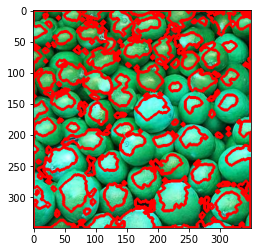

In [ ]:
ans = int((ws + len(count)) / 2)
print("Number of lemon segments detected = ", ans)
cv2.drawContours(img, count, -1, (255,0,0), 3)
show(img)

## The number of Lemons detected by the algorithm were 64. What's your answer ? 